In [44]:
import numpy as np
import pandas as pd
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json
TOLERANCE = 1e-10
import pickle
import statistics
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
from scipy.stats import skew, kurtosis, norm
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
fff = pd.read_csv('/content/drive/MyDrive/_Data_/ffm.csv', index_col = "dateff", parse_dates = True)[1:]
vix = pd.read_csv('/content/drive/MyDrive/_Data_/^VIX.csv', index_col = "Date", parse_dates = True)["Adj Close"]
rf = fff["rf"]
signals = []
for value in vix.values:
  if value > 30:
    signals.append("High")
  elif 15 < value <= 30:
    signals.append("Normal")
  else:
    signals.append("Low")

with open("/content/drive/MyDrive/_Data_/port_rets.json", "rb") as data:
    port_rets = pickle.load(data)[:-1]

with open("/content/drive/MyDrive/_Data_/ports_beta.json", "rb") as data:
    port_rets_beta = pickle.load(data)[:-1]


with open("/content/drive/MyDrive/_Data_/dates.json", "rb") as data:
    plot_dates = pickle.load(data)[12:]



In [47]:
excess_returns = pd.DataFrame(port_rets, index = plot_dates[1:], columns = ["Strategy Returns"]) 
excess_returns["Risk Free"] = rf.values
excess_returns["Excess Returns"] = excess_returns["Strategy Returns"] - excess_returns["Risk Free"]
excess_returns_beta = pd.DataFrame(port_rets_beta, index = plot_dates[1:], columns = ["Strategy Returns"]) 
excess_returns_beta["Risk Free"] = rf.values
excess_returns_beta["Excess Returns"] = excess_returns_beta["Strategy Returns"] - excess_returns_beta["Risk Free"]

**Sharpe Ratios throughout time**

In [48]:
years = range(1998, 2023)
srs = []

for i in range(len(years)-1):
  rets = excess_returns['Excess Returns'][str(years[i]) : str(years[i+1])]
  mean = np.mean(rets)
  std = statistics.pstdev(rets)
  sr = mean/std * np.sqrt(12)
  srs.append(sr)

rets = excess_returns['Excess Returns']["2022" : ]
mean = np.mean(rets)
std = statistics.pstdev(rets)
sr = mean/std * np.sqrt(12)
srs.append(sr)


In [49]:
srs_beta = []

for i in range(len(years)-1):
  rets = excess_returns_beta['Excess Returns'][str(years[i]) : str(years[i+1])]
  mean = np.mean(rets)
  std = statistics.pstdev(rets)
  sr = mean/std * np.sqrt(12)
  srs_beta.append(sr)




rets = excess_returns_beta['Excess Returns']["2022" : ]
mean = np.mean(rets)
std = statistics.pstdev(rets)
sr = mean/std * np.sqrt(12)
srs_beta.append(sr)


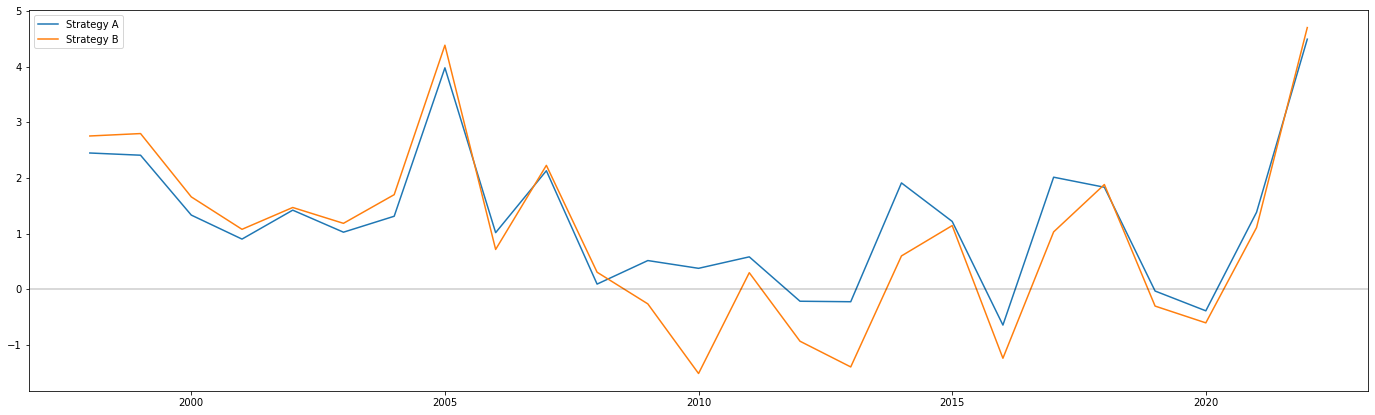

In [50]:
df = pd.DataFrame(srs, index = years)
df["Strategy B"] = srs_beta
plt.figure(figsize=(24,7))
plt.plot(df)
plt.axhline(y=0, color = "black", alpha = 0.2)
plt.legend(["Strategy A", "Strategy B"])

**Sharpe Ratios in 2020**

In [51]:
dates = excess_returns["Excess Returns"]["2020":"2021"].index
df = pd.DataFrame(excess_returns["Excess Returns"]["2020":"2021"].values, index = dates)
df["Strategy B"] = excess_returns_beta["Excess Returns"]["2020":"2021"].values

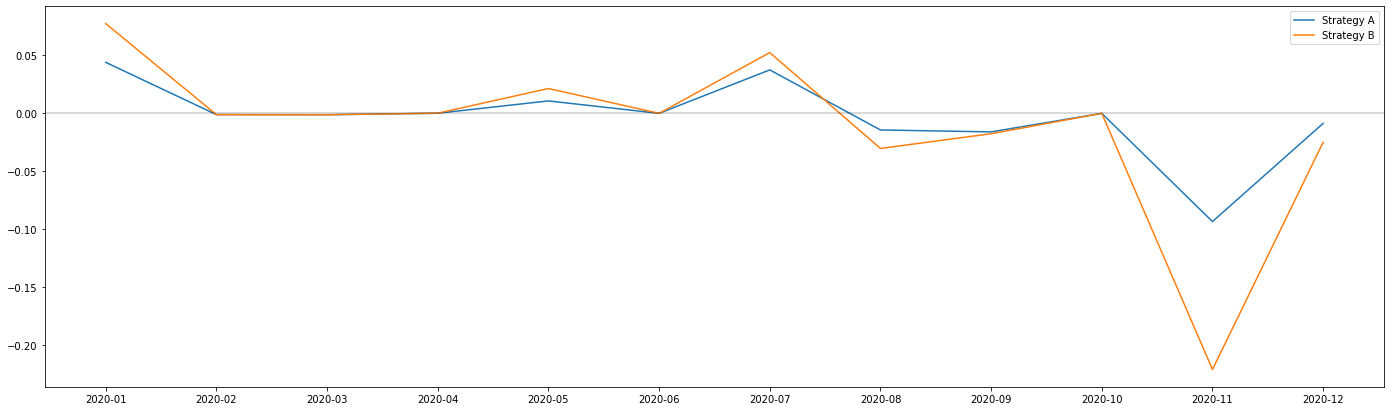

In [52]:
plt.figure(figsize=(24,7))
plt.plot(df)
plt.axhline(y=0, color = "black", alpha = 0.2)
plt.legend(["Strategy A", "Strategy B"])

**Number of Stocks per Month**

In [53]:
with open("/content/drive/MyDrive/_Data_/annualReturns.json", "rb") as data:
    annualRets = pickle.load(data)

([<matplotlib.axis.XTick at 0x7f30b4d77280>,
 <a list of 13 Text major ticklabel objects>)

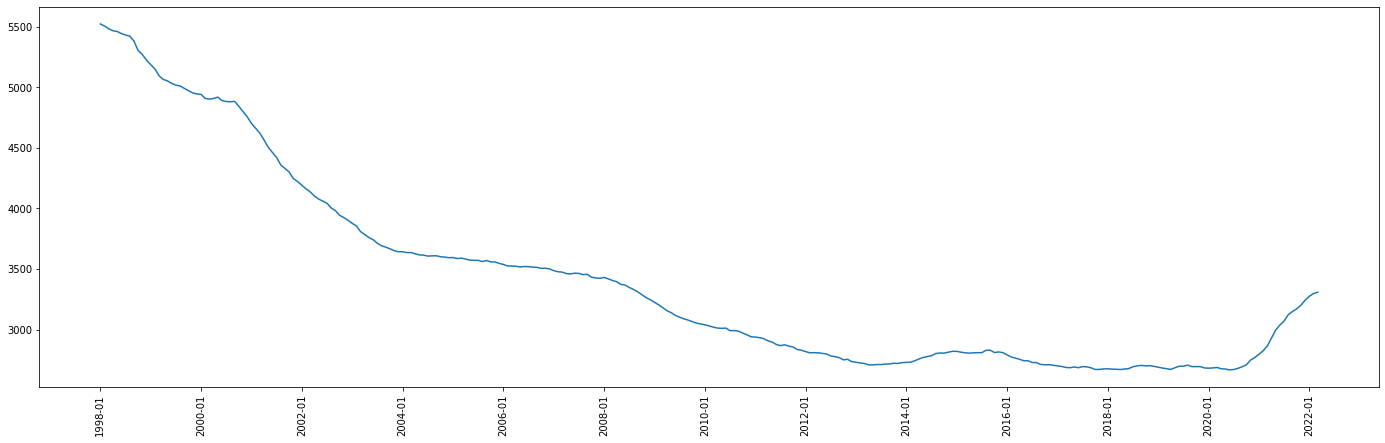

In [54]:
total = []
for period in annualRets:
  stocks = len(period)
  total.append(stocks)

df = pd.DataFrame(total, columns = ["Total Stocks"], index = plot_dates)
ticks = df.index
plt.figure(figsize=(24,7))
plt.plot(df)
plt.xticks([ticks[i] for i in range(len(ticks)) if i % 24 == 0], rotation='vertical')


**Weights Strategy A**

In [55]:
with open("/content/drive/MyDrive/_Data_/long_weights_historic.json", "rb") as data:
    long_weights_historic = pickle.load(data)
with open("/content/drive/MyDrive/_Data_/short_weights_historic.json", "rb") as data:
    short_weights_historic = pickle.load(data)
with open("/content/drive/MyDrive/_Data_/total_weights_historic.json", "rb") as data:
    total_weights_historic = pickle.load(data)

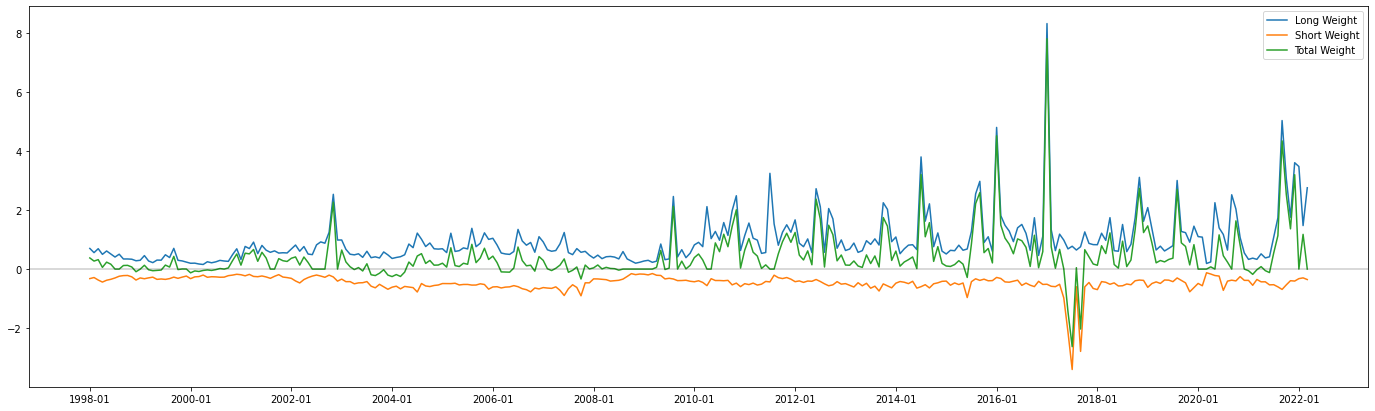

In [56]:
df = pd.DataFrame(long_weights_historic, columns = ["Long Weight"], index = plot_dates)
df["Short Weight"] = short_weights_historic
df["Total Weight"] = total_weights_historic
ticks = df.index

plt.figure(figsize=(24,7))
cum_plot = plt.plot(df)
plt.xticks([plot_dates[i] for i in range(len(plot_dates)) if i % 24 == 0])
sns.color_palette("colorblind")
plt.axhline(y=0, color = "black", alpha = 0.2)
plt.legend(df.columns)
plt.show()

**Strategy B weights**

In [57]:
with open("/content/drive/MyDrive/_Data_/long_weights_beta_historic.json", "rb") as data:
    long_weights_historic = pickle.load(data)
with open("/content/drive/MyDrive/_Data_/short_weights_beta_historic.json", "rb") as data:
    short_weights_historic = pickle.load(data)
with open("/content/drive/MyDrive/_Data_/total_weights_beta_historic.json", "rb") as data:
    total_weights_historic = pickle.load(data)

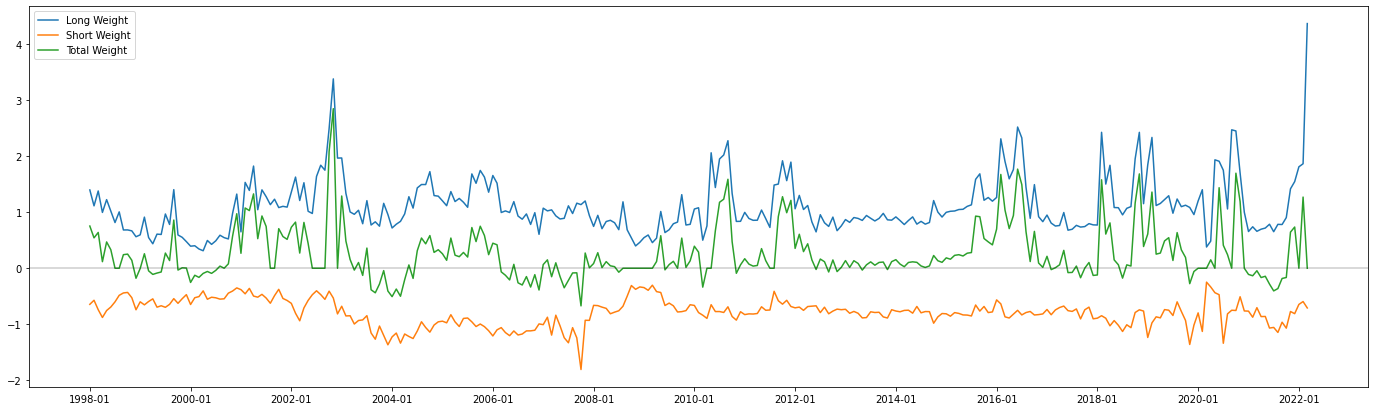

In [58]:
df = pd.DataFrame(long_weights_historic, columns = ["Long Weight"], index = plot_dates)
df["Short Weight"] = short_weights_historic
df["Total Weight"] = total_weights_historic
ticks = df.index

plt.figure(figsize=(24,7))
cum_plot = plt.plot(df)
plt.xticks([plot_dates[i] for i in range(len(plot_dates)) if i % 24 == 0])
sns.color_palette("colorblind")
plt.axhline(y=0, color = "black", alpha = 0.2)
plt.legend(df.columns)
plt.show()

**Cumulative Plot**

In [59]:
mom = pd.read_csv('/content/drive/MyDrive/_Data_/momentum.csv', index_col = "dateff", parse_dates = True).values[1:]
mkt_rf = fff["mktrf"].values

In [60]:
cum_mom = 1
cum_mom_rets = [1]
for ret in mom:
  cum_mom = cum_mom * (1 + ret)
  cum_mom_rets.append(cum_mom)

rets_beta = excess_returns_beta["Excess Returns"].values
cum_beta = 1
cum_rets_beta = [1]
for ret in rets_beta:
  cum_beta = cum_beta * (1 + ret)
  cum_rets_beta.append(cum_beta)

  cum_mkt = 1
cum_mkt_rets = [1]
for ret in mkt_rf:
  cum_mkt = cum_mkt * (1 + ret)
  cum_mkt_rets.append(cum_mkt)

rets = excess_returns["Excess Returns"].values
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

In [61]:
df = pd.DataFrame(cum_rets, columns = ["Strategy A"], index = plot_dates)
df["Strategy B"] = cum_rets_beta
df["Excess Market Return"] = cum_mkt_rets
df["Momentum Factor"] = cum_mom_rets
ticks = df.index

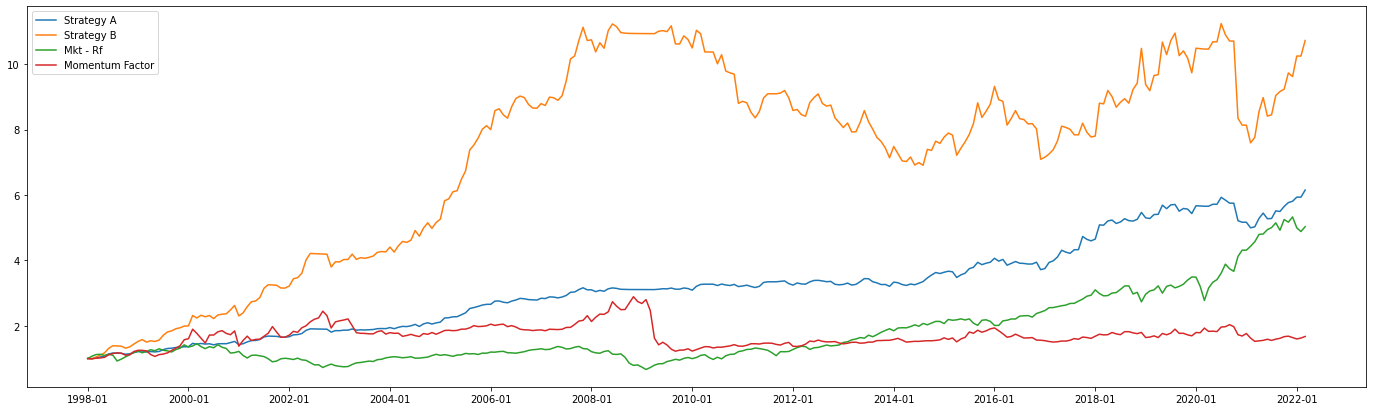

In [62]:
plt.figure(figsize=(24,7))
cum_plot = plt.plot(df)
plt.xticks([plot_dates[i] for i in range(len(plot_dates)) if i % 24 == 0])
sns.color_palette("colorblind")
plt.legend(['Strategy A',
            "Strategy B", 
            'Mkt - Rf',
            'Momentum Factor'])
plt.show()

**Distribution Plot**

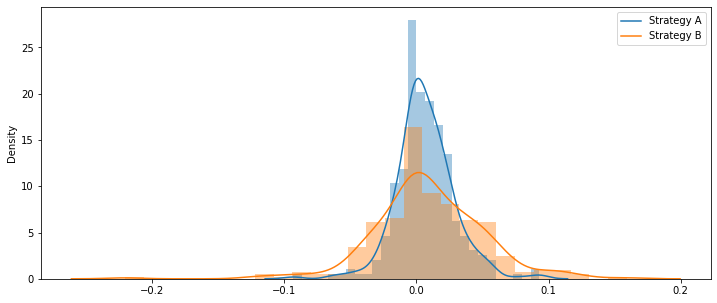

In [63]:
plt.figure(figsize=(12,5))
sns.color_palette("cubehelix", as_cmap=True)
sns.distplot(rets,hist=True)
sns.distplot(rets_beta, hist = True)
plt.legend(['Strategy A', 
            'Strategy B'])
plt.show()

**Group Part Plots**

In [64]:
group_dates = plot_dates[119:240]


In [65]:
mom = pd.read_csv('/content/drive/MyDrive/_Data_/momentum.csv', index_col = "dateff", parse_dates = True)["2008":"2017"].values
mkt_rf = fff["mktrf"]["2008":"2017"].values
cum_mom = 1
cum_mom_rets = [1]
for ret in mom:
  cum_mom = cum_mom * (1 + ret)
  cum_mom_rets.append(cum_mom)

  cum_mkt = 1
cum_mkt_rets = [1]
for ret in mkt_rf:
  cum_mkt = cum_mkt * (1 + ret)
  cum_mkt_rets.append(cum_mkt)

rets = excess_returns["Excess Returns"]["2008":"2018"].values
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

In [66]:
df = pd.DataFrame(cum_rets, columns = ["Strategy"], index = group_dates)
df["Excess Market Return"] = cum_mkt_rets
df["Momentum Factor"] = cum_mom_rets
ticks = df.index

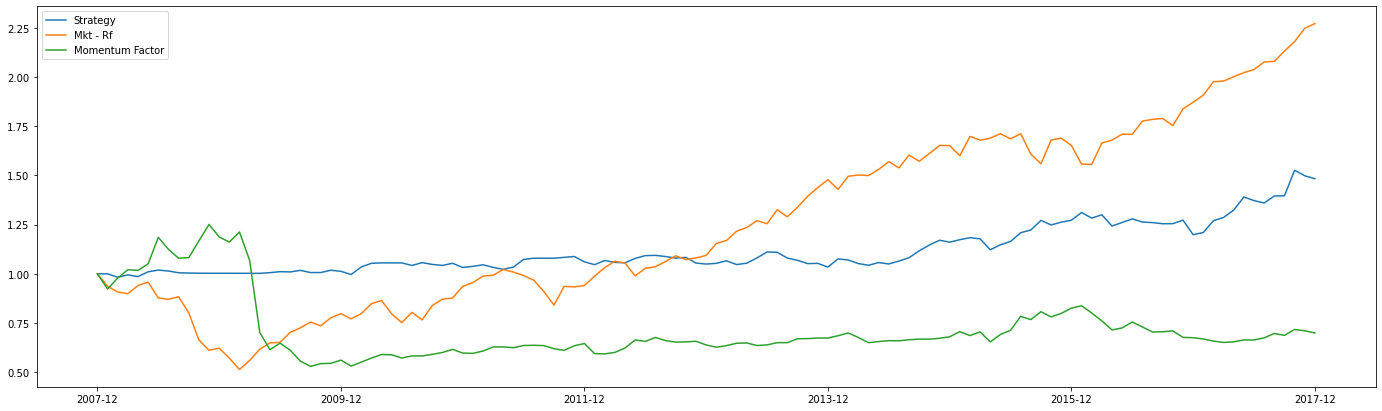

In [67]:
plt.figure(figsize=(24,7))
cum_plot = plt.plot(df)
plt.xticks([group_dates[i] for i in range(len(group_dates)) if i % 24 == 0])
sns.color_palette("colorblind")
plt.legend(['Strategy', 
            'Mkt - Rf',
            'Momentum Factor'])
plt.show()